# Exploratory Data Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro

In [48]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [27]:
df.Name

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

Le nombre de données est de  7736
Le nombre de variable est de  15
La target est :  Transported
La target est de type :  bool
La valeur des targets varient de False à True
Voici tous les types de variables : 
object     8
float64    6
bool       1
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


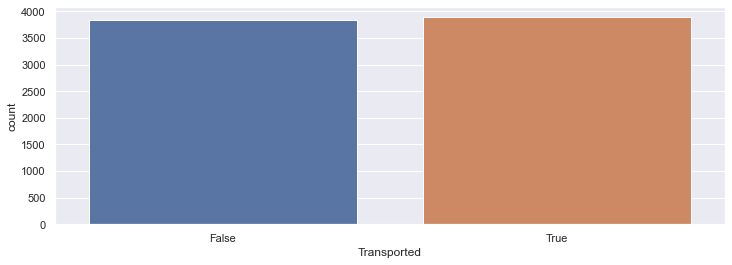

In [38]:
df = df.copy()
n, m = df.shape
target = 'Transported'
target_min = np.min(df[target])
target_max = np.max(df[target])


print('Le nombre de données est de ', n)
print('Le nombre de variable est de ', m)

print('La target est : ', target)
print('La target est de type : ', np.dtype(df[target]))
print(f'La valeur des targets varient de {target_min} à {target_max}')
print('Voici tous les types de variables : ', )
print(df.dtypes.value_counts())

plt.figure(figsize=(12,4))
sns.set()
sns.countplot(df[target])
plt.show()

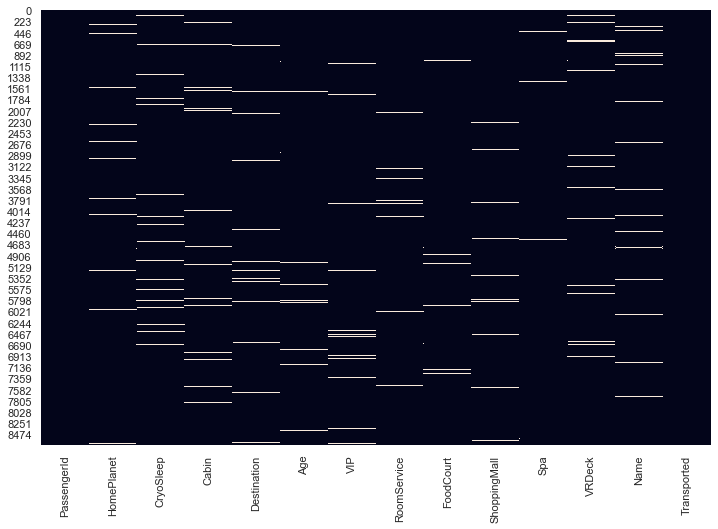

Les proportions de données manquantes :
PassengerId     0.000000
Transported     0.000000
Age             0.020591
RoomService     0.020821
Destination     0.020936
FoodCourt       0.021051
Spa             0.021051
VRDeck          0.021627
Cabin           0.022892
Name            0.023007
HomePlanet      0.023122
VIP             0.023352
ShoppingMall    0.023927
CryoSleep       0.024963
dtype: float64


In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cbar=False)
plt.show()

print('Les proportions de données manquantes :')
print((df.isna().sum()/n).sort_values())

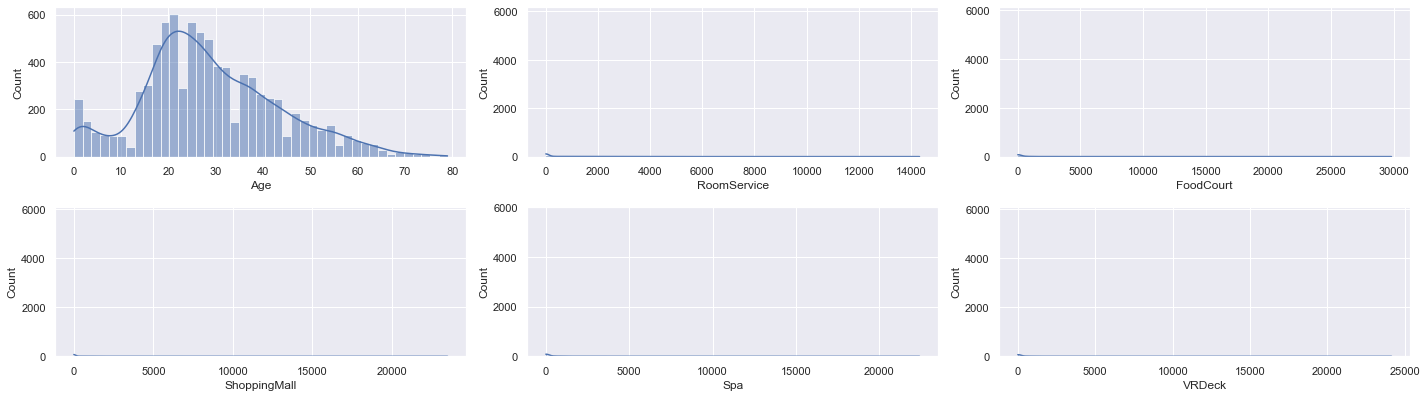

In [7]:
p = int(np.sqrt(df.columns[df.dtypes == 'float64'].size))+1
plt.figure(figsize=(20,8))
i = 0
for var in df.columns[df.dtypes == 'float64']:
    plt.subplot(p,p,i+1)
    sns.histplot(df[var], kde=True)
    i += 1
plt.tight_layout()
plt.show()

In [8]:
for col in df.columns[df.dtypes == 'object']:
    print(f'Pour la variable {col :-<40} on a les éléments {df[col].unique()}')

Pour la variable PassengerId----------------------------- on a les éléments ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
Pour la variable HomePlanet------------------------------ on a les éléments ['Europa' 'Earth' 'Mars' nan]
Pour la variable CryoSleep------------------------------- on a les éléments [False True nan]
Pour la variable Cabin----------------------------------- on a les éléments ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Pour la variable Destination----------------------------- on a les éléments ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Pour la variable VIP------------------------------------- on a les éléments [False True nan]
Pour la variable Name------------------------------------ on a les éléments ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


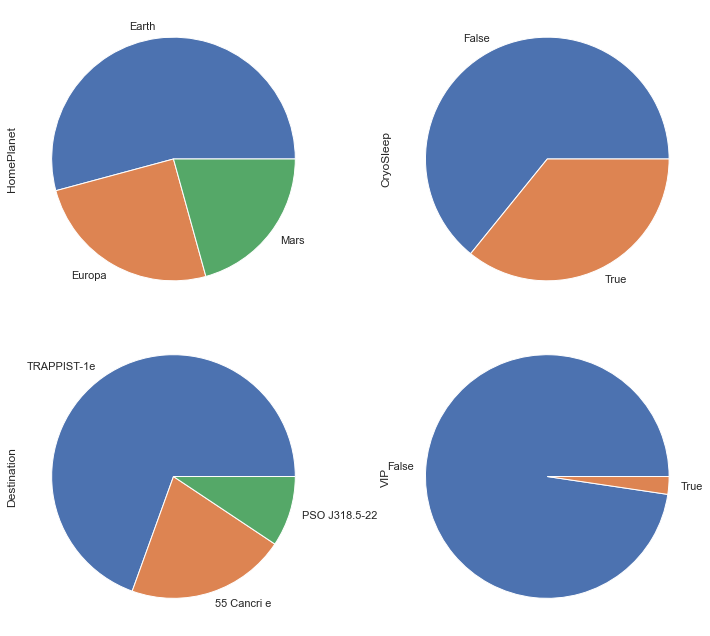

In [10]:
p = 2 
plt.figure(figsize=(10,9))
col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
i = 0
for var in col:
    plt.subplot(p, p, i+1)
    df[var].value_counts().plot.pie()
    i += 1
plt.tight_layout()
plt.show()

<Figure size 864x864 with 0 Axes>

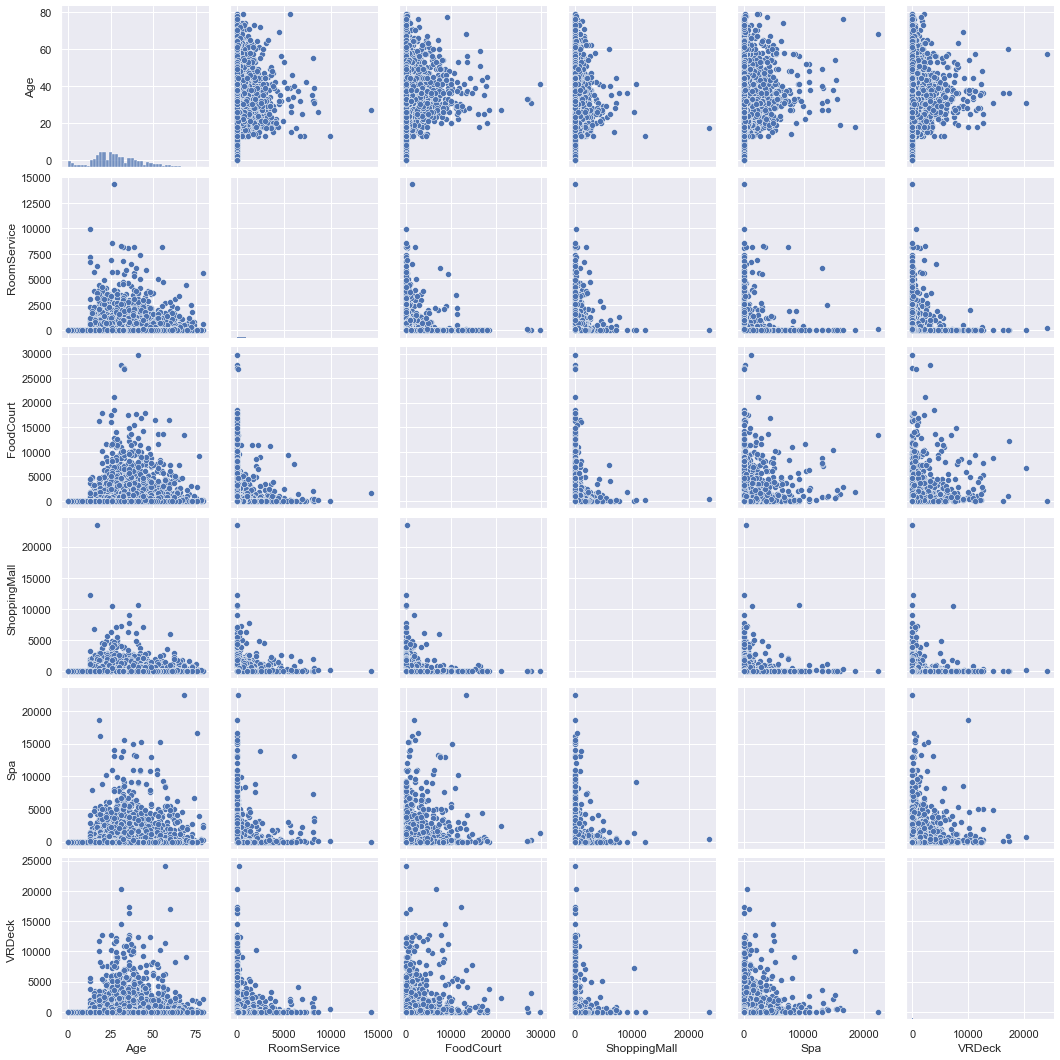

In [11]:
plt.figure(figsize=(12,12))
sns.pairplot(df[df.columns[df.dtypes == 'float64']])
plt.show()

In [12]:
df.corr()[target].sort_values()

RoomService    -0.244611
Spa            -0.221131
VRDeck         -0.207075
Age            -0.075026
ShoppingMall    0.010141
FoodCourt       0.046566
Transported     1.000000
Name: Transported, dtype: float64

In [14]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


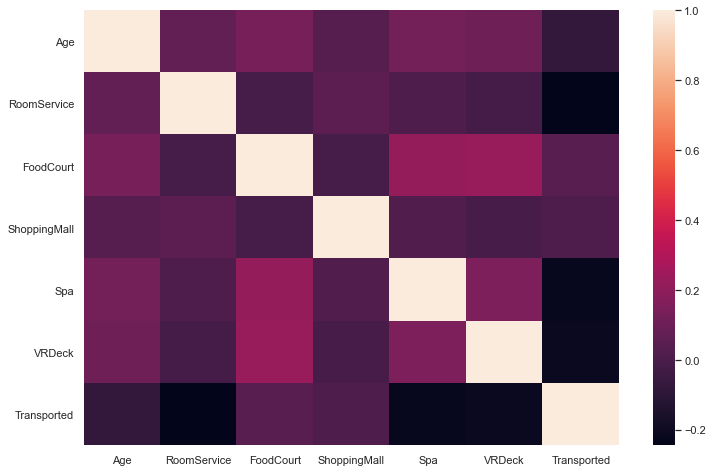

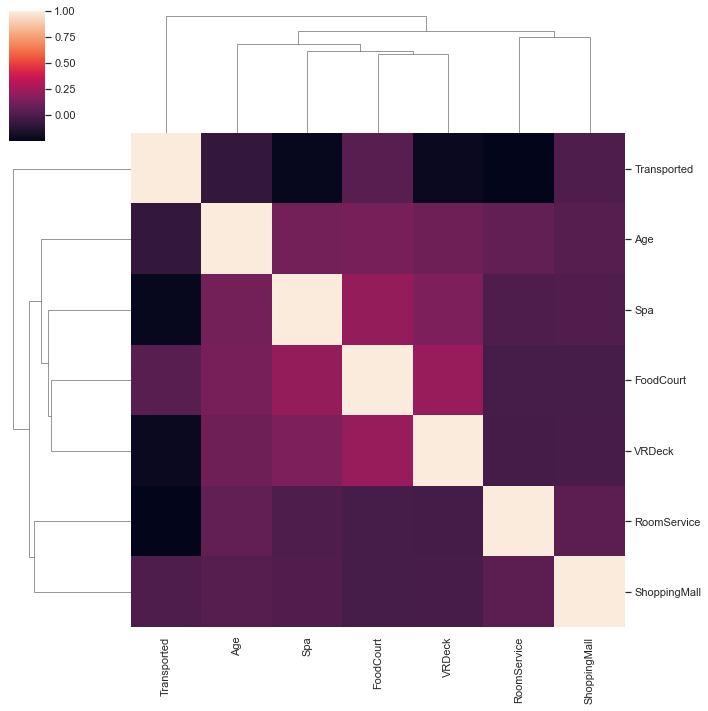

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
sns.clustermap(df.corr())
plt.show()

# Preprocessing function of dataset

In [125]:
def split_cabin(x):
    if len(str(x).split('/')) <3 :
        return ['Missing', 'Missing', "Missing"]
    else:
        return str(x).split('/')

def preprocessing (tab):
    tab['HomePlanet'].fillna('Missing', inplace=True)
    
    tab['TempCabin'] = tab['Cabin'].apply(lambda x: split_cabin(x))
    tab['Deck'] = tab['TempCabin'].apply(lambda x : x[0])
    tab['Side'] = tab['TempCabin'].apply(lambda x : x[2])
    tab.drop(['TempCabin', 'Cabin'], axis=1, inplace = True)
    
    tab['Destination'].fillna('Missing', inplace=True)
    tab['Age'].fillna(tab['Age'].mean(), inplace=True)
    tab['RoomService'].fillna(0, inplace=True)
    tab['FoodCourt'].fillna(0, inplace=True)
    tab['ShoppingMall'].fillna(0, inplace=True)
    tab['Spa'].fillna(0, inplace=True)
    tab['VRDeck'].fillna(0, inplace=True)
    
    tab.drop('Name', axis=1, inplace=True)
    tab.dropna(inplace=True)
    

In [126]:
df_copy = df.copy()
df_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [127]:
preprocessing(df_copy)
df_copy.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [129]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8280 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8280 non-null   object 
 1   HomePlanet    8280 non-null   object 
 2   CryoSleep     8280 non-null   object 
 3   Destination   8280 non-null   object 
 4   Age           8280 non-null   float64
 5   VIP           8280 non-null   object 
 6   RoomService   8280 non-null   float64
 7   FoodCourt     8280 non-null   float64
 8   ShoppingMall  8280 non-null   float64
 9   Spa           8280 non-null   float64
 10  VRDeck        8280 non-null   float64
 11  Transported   8280 non-null   bool   
 12  Deck          8280 non-null   object 
 13  Side          8280 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 913.7+ KB


# Modelling

In [130]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [131]:
X = df_copy.drop(['Transported', 'PassengerId'], axis=1)
X = pd.get_dummies(X)
y = df_copy['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [135]:
pipelines = {
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=0)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=0))
}

grid = {
    'rf' : {
        'randomforestclassifier__n_estimators' : [100, 200, 300]
    },
    
    'gb' : {
        'gradientboostingclassifier__n_estimators' : [100, 200, 300]
    }
}

fit_models ={}
for algo, pipeline in pipelines.items():
    print(f'Training the {algo} model.')
    model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10)
    model.fit(X_train, y_train)
    fit_models[algo] = model

Training the rf model.
Training the gb model.


# Evaluate Performance on Test Partition

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [137]:
for algo, model in fit_models.items():
    y = model.predict(X_test)
    accuracy = accuracy_score(y_test, y)
    precision = precision_score(y_test, y)
    recall = recall_score(y_test, y)
    print(f'Metrics for {algo} accuracy- {accuracy}, recall- {recall}, precision- {precision}')

Metrics for rf accuracy- 0.7906602254428341, recall- 0.7661812297734628, precision- 0.8039049235993209
Metrics for gb accuracy- 0.7954911433172303, recall- 0.8333333333333334, precision- 0.7732732732732732


In [140]:
def evaluation(mod):
    y = mod.predict(X_test)

    print(confusion_matrix(y_test,y))
    print(classification_report(y_test,y))
    
    #N, train_score, val_score = learning_curve(mod, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    #plt.figure(figsize=(12,8))
    #plt.plot(N, train_score.mean(axis=1), label='train score')
    #plt.plot(N, val_score.mean(axis=1), label='val score')
    #plt.legend()
    #plt.show()


In [141]:
for algo, model in fit_models.items():
    print(f'Metrics for {algo} :')
    evaluation(model)

Metrics for rf :
[[1017  231]
 [ 289  947]]
              precision    recall  f1-score   support

       False       0.78      0.81      0.80      1248
        True       0.80      0.77      0.78      1236

    accuracy                           0.79      2484
   macro avg       0.79      0.79      0.79      2484
weighted avg       0.79      0.79      0.79      2484

Metrics for gb :
[[ 946  302]
 [ 206 1030]]
              precision    recall  f1-score   support

       False       0.82      0.76      0.79      1248
        True       0.77      0.83      0.80      1236

    accuracy                           0.80      2484
   macro avg       0.80      0.80      0.80      2484
weighted avg       0.80      0.80      0.80      2484



# Test Data

In [142]:
test = pd.read_csv('test.csv')
df_test = test.copy()
preprocessing(df_test)
df_test = pd.get_dummies(df_test.drop('PassengerId', axis=1))
len(df_test.columns)

30

In [143]:
len(X.columns)

30

In [153]:
y = fit_models['gb'].predict(df_test)
submission = pd.DataFrame([test['PassengerId'], y]).T
submission.columns = ['PassengerID', 'Transported']
submission

,PassengerID,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,NaN
4273,9269_01,NaN
4274,9271_01,NaN
4275,9273_01,NaN


In [154]:
submission.to_csv('submission.csv', index=False) 